In [11]:
from sklearn.cluster import DBSCAN
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import normalization
from sklearn.neighbors import NearestNeighbors

Import data

In [12]:
data_norm = normalization.normalized_dataframe
print(data_norm.head(5))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             0.751425     0.626620         0.929816              0.573101   
1             0.362306     0.393016         0.550801              0.359869   
2             0.524953     0.426378         0.524803              0.576396   
3             0.722409     0.787050         0.460890              0.428434   
4             0.574861     0.647702         0.594748              0.627768   

   Yearly Amount Spent  
0             0.651040  
1             0.266355  
2             0.453725  
3             0.639055  
4             0.673552  


Layman's method

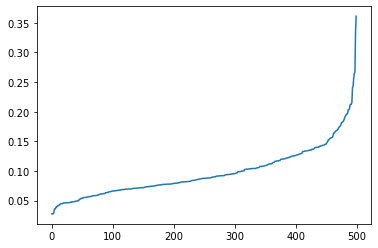

In [13]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

In [69]:
dbscan = DBSCAN(eps=0.2, min_samples=20)
clusters = dbscan.fit_predict(data_norm)
#print(clusters)

Layman's method for only two dimensions

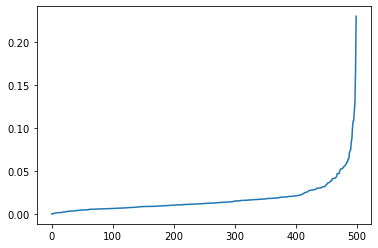

In [66]:
x = data_norm.iloc[:,[2,4]]

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

DBSCAN visualisation with two dimensions

No handles with labels found to put in legend.


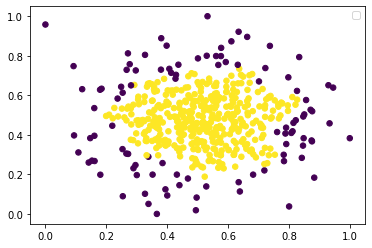

In [72]:
x = data_norm.iloc[:,[2,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(x)
#print(clusters)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=clusters, s=30)
plt.legend()
plt.show()






No handles with labels found to put in legend.


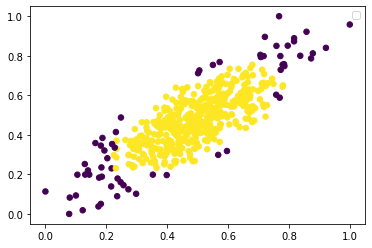

In [73]:
x = data_norm.iloc[:,[3,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(x)
#print(clusters)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=clusters, s=30)
plt.legend()
plt.show()

No handles with labels found to put in legend.


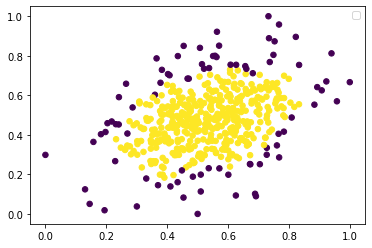

In [76]:
x = data_norm.iloc[:,[0,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(x)
#print(clusters)

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=clusters, s=30)
plt.legend()
plt.show()